In [11]:
# %load graph.py
#!/usr/bin/env python

# In[ ]:


import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False


In [15]:
#서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터만 선택해서 사용
df = pd.read_excel("./dataset/시도별 전출입 인구수.xlsx", header=0)
# NaN 데이터 처리 fillna 함수로 이용, 이전행의 자료로 변경
df.fillna(method='ffill')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [29]:
#서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전출지별'] == '경상북도') | \
        (df['전입지별'] == '충청남도') | (df['전출지별'] == '강원도')

df_data = df[mask]
# 년도가 string 이므로 int로 변경
df_data.drop(['전출지별'], inplace=True, axis=1)
df_data.rename({'전입지별':'전입자'}, axis=1, inplace=True)
df_data.set_index('전입자', inplace=True)
# 인덱스는 년도
df_data.head()

C:\Users\YOUNG\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\YOUNG\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입자,,,,,,,,,,,,,,,,,,,,,
충청남도,192979,205632,190175,239750,217167,482034,292314,341491,384579,327162,...,355294,329626,317853,321187,287195,281428,289627,289952,286764,288738
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
충청남도,1901,1994,1801,2255,2212,6467,4149,4584,5656,4526,...,3744,3738,3893,3758,3334,2909,3664,3164,3160,3242
충청남도,-,-,-,-,-,-,-,-,-,-,...,2717,2579,2730,2647,2706,2599,2682,2509,2323,2578
충청남도,-,-,-,-,-,-,-,-,-,-,...,11146,9859,9985,9332,8591,8752,8964,9101,8728,8730


In [35]:
df_t = df_data.T

ConversionError: Failed to convert value(s) to axis units: array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 2427, 2983,
       3057, 3250, 3211, 3280, 3340, 3164, 1218, 1303, 1404, 1302, 1312,
       1272, 1520, 1924, 2074, 2047, 1987, 2087, 2046, 2014, 2324, 3163,
       2770, 2594, 2763, 2717, 2579, 2730, 2647, 2706, 2599, 2682, 2509,
       2323, 2578], dtype=object)

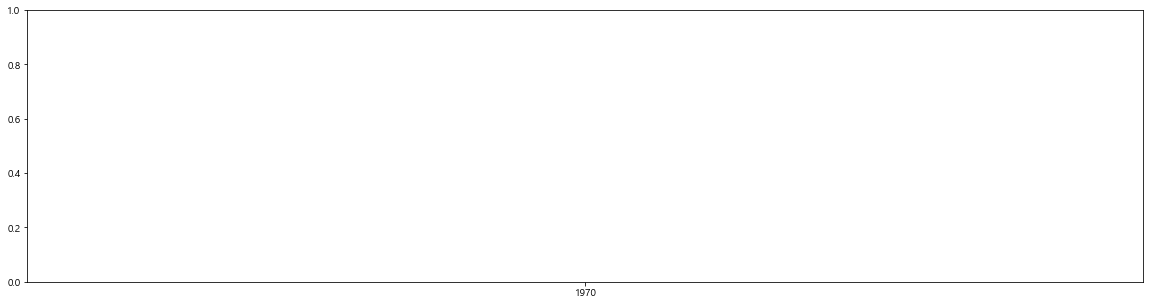

In [39]:

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_t.index, df_t["충청남도"], marker='o', color='red')
ax.plot(df_t.index, df_t["경상북도"], marker='+', color='b')
ax.plot(df_t.index, df_t["강원도"], marker='.', color='black')
ax.set_title("서울-> 충남, 경북, 강원 이동 인구", size=20)
ax.set_xlabel("기간")
ax.set_ylabel("인구수")
legend_labels = ["충청남도","경상북도","강원도"]
ax.legend(legend_labels,loc='best', fontsize=15)

plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 2427, 2983,
       3057, 3250, 3211, 3280, 3340, 3164, 1218, 1303, 1404, 1302, 1312,
       1272, 1520, 1924, 2074, 2047, 1987, 2087, 2046, 2014, 2324, 3163,
       2770, 2594, 2763, 2717, 2579, 2730, 2647, 2706, 2599, 2682, 2509,
       2323, 2578], dtype=object)

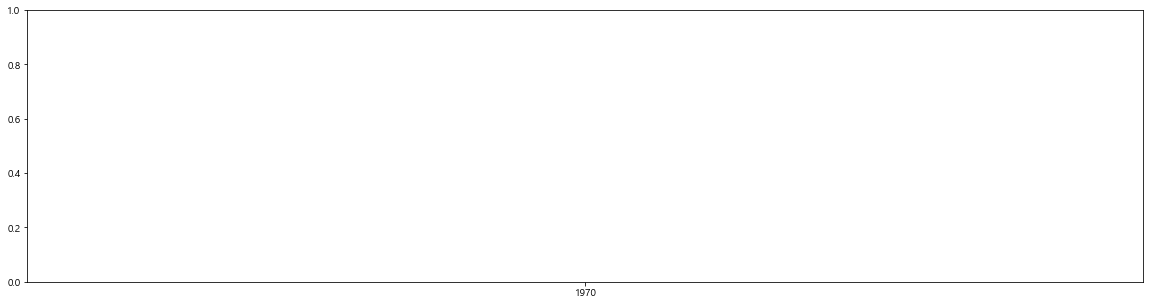

In [38]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_t.index, df_t["충청남도"], marker='o', color='red')
ax.plot(df_t.index, df_t["경상북도"], marker='+', color='b')
ax.plot(df_t.index, df_t["강원도"], marker='.', color='black')
ax.set_title("서울-> 충남, 경북, 강원 이동 인구", size=20)
ax.set_xlabel("기간")
ax.set_ylabel("인구수")

legend_labels = ["충청남도","경상북도","강원도"]
ax.legend(legend_labels,loc='best', fontsize=15)

plt.show()

In [ ]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

NameError: name 'col_years' is not defined

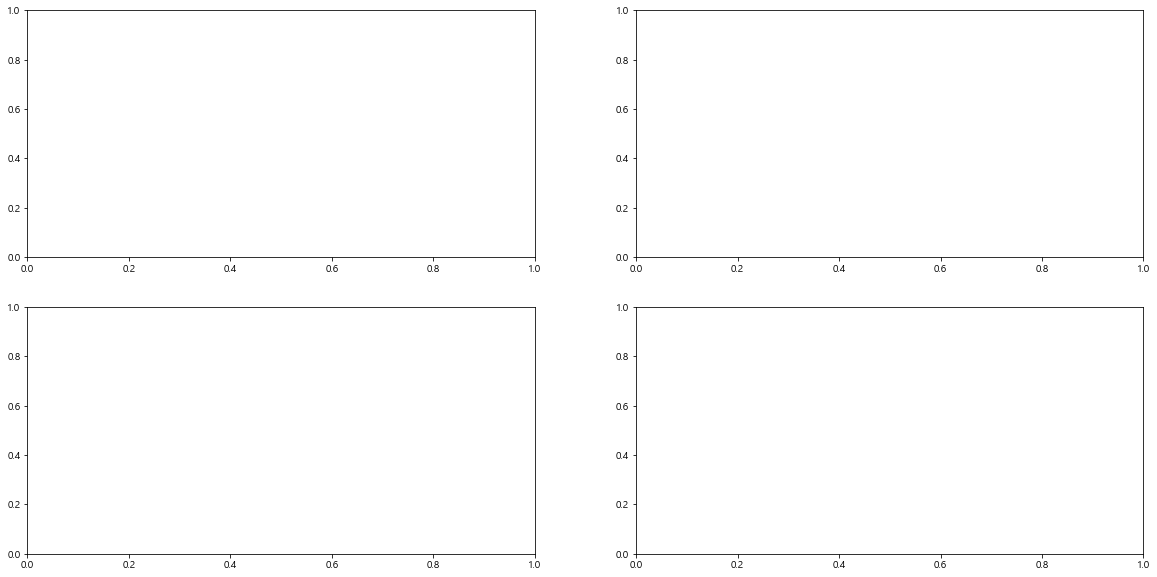

In [32]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)  #add_subplot(행의갯수,열의갯수, 위치) > 행부터
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.lopc["충청남도"], marker='.', color='red')
ax2.plot(col_years, df_4.lopc["경상북도"], marker='+', color='b')
ax3.plot(col_years, df_4.lopc["강원도"], marker='.', color='red')
ax4.plot(col_years, df_4.lopc["전라남도"], marker='+', color='b')

ax1.set_title("서울-> 충남", size=20)
ax2.set_title("서울-> 경북", size=20)
ax3.set_title("서울-> 강원", size=20)
ax4.set_title("서울-> 전남", size=20)

ax.set_xlabel("기간")
ax.set_xlabel("인구수")

plt.show()

In [ ]:
fig1 = plt.figure(figsize=(20,10))
df_4 = df_4.T

In [41]:
df_4.index = df_4.index.map(int)
# area 그래프
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize-15)

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-41-14c0af915ad9>, line 3)

In [ ]:
# 막대그래프, 수직, 수평 그래프